In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range('2017-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds':ds, 'y':result})
df.head()

,ds,y
0,2017-01-01,0.000000
1,2017-01-02,0.103243
2,2017-01-03,0.205382
3,2017-01-04,0.305326
4,2017-01-05,0.402007


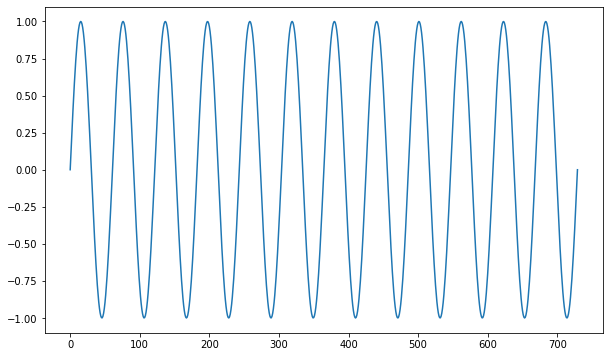

In [8]:
df['y'].plot(figsize=(10,6));

In [3]:
from fbprophet import Prophet

In [4]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [5]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

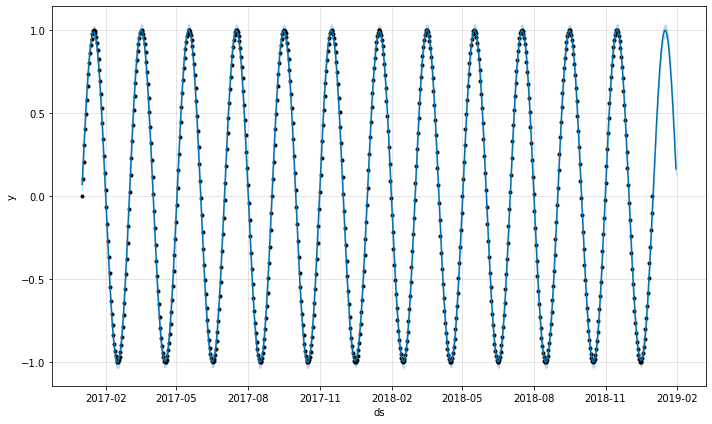

In [6]:
m.plot(forecast);

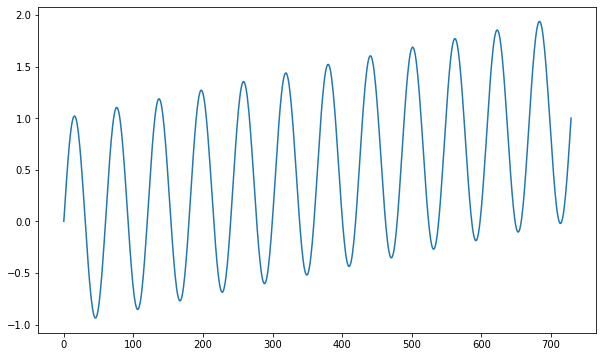

In [10]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time

ds = pd.date_range('2017-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds':ds, 'y':result})

df['y'].plot(figsize=(10,6));

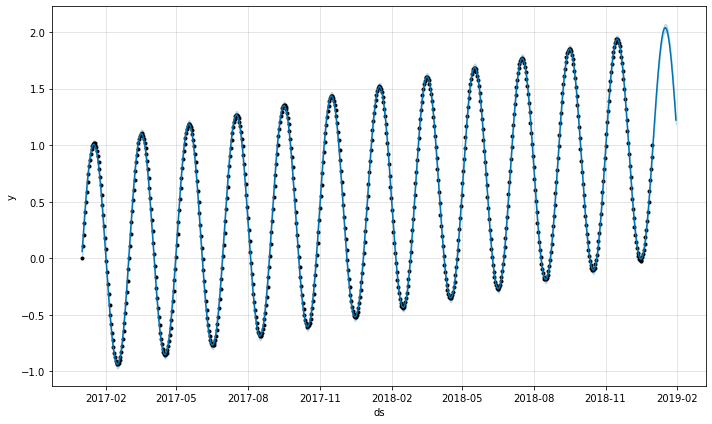

In [12]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

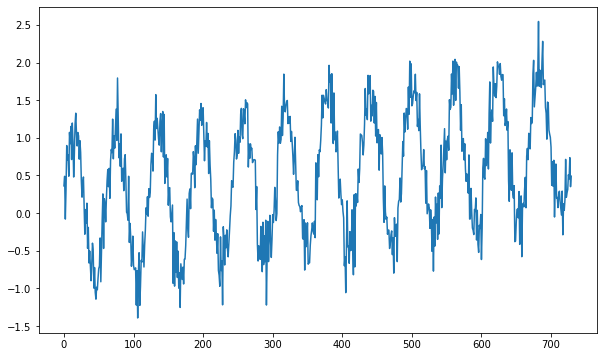

In [15]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4

ds = pd.date_range('2017-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds':ds, 'y':result})

df['y'].plot(figsize=(10,6));

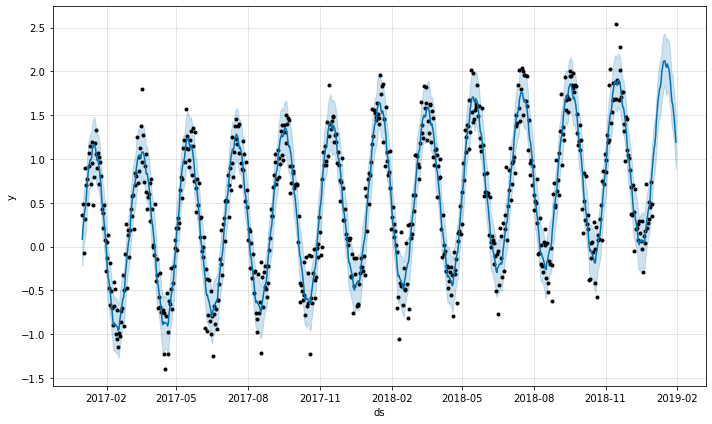

In [16]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

In [23]:
pinkwink_web = pd.read_excel('./datas/pinkwink_web.xlsx', names=['ds', 'hit'])
pinkwink_web.head()

,ds,hit
0,2016-01-01,228
1,2016-01-02,304
2,2016-01-03,304
3,2016-01-04,659
4,2016-01-05,769


In [26]:
df = pd.DataFrame({'ds':pd.to_datetime(pinkwink_web['ds'], format='%y. %m. %d'),
                  'y':pinkwink_web['hit']})df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1096 non-null   datetime64[ns]
 1   y       1096 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.2 KB


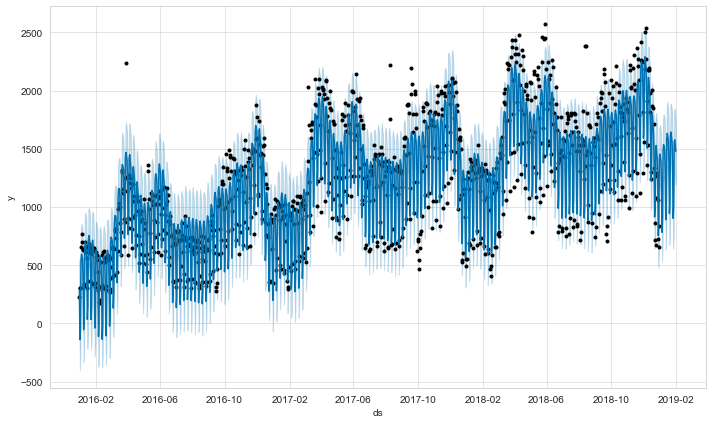

In [32]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=31)
forecast = m.predict(future)
m.plot(forecast);

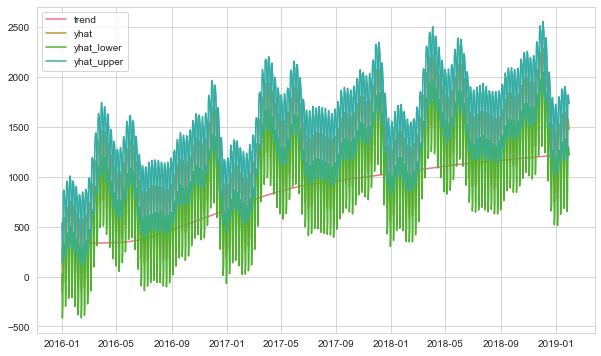

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('husl')

plt.figure(figsize=(10,6))
for each in ['trend', 'yhat', 'yhat_lower', 'yhat_upper']:
    plt.plot(forecast['ds'], forecast[each], label=each)
    
plt.legend(loc='best');

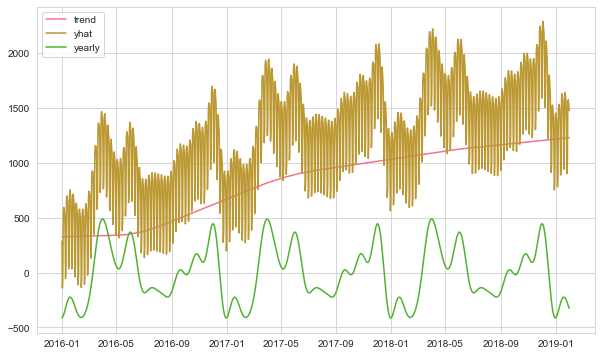

In [29]:
plt.figure(figsize=(10,6))
for each in ['trend', 'yhat', 'yearly']:
    plt.plot(forecast['ds'], forecast[each], label=each)
    
plt.legend(loc='best');

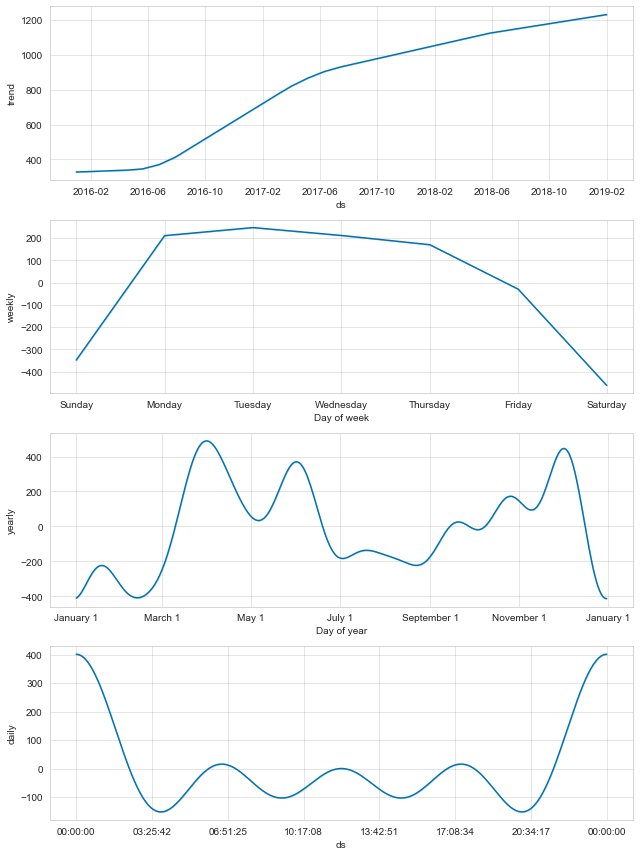

In [30]:
m.plot_components(forecast);